In [64]:
import matplotlib.pyplot as plot
import seaborn as sns
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import requests
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import sklearn.metrics as metrics
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier
from collections import Counter
from sklearn.feature_selection import SelectKBest
from numpy import array
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [65]:
df = pd.read_csv('./automoviles-limpio.csv')
df.head()

,Unnamed: 0,riesgoso,normalized-losses,wheel-base,height,bore,stroke,peak-rpm,price,brand_int,fuel_gas,aspiration_int,body-style_int,drive-wheels-int,engine-location_int,engine-type_int,num-of-cilinders-int,fuel-system_int
0,0,0,169,88.6,48.8,3.47,2.68,5000,13495,0,1,0,0,76,0,0,4,0
1,1,0,169,88.6,48.8,3.47,2.68,5000,16500,0,1,0,0,76,0,0,4,0
2,2,0,126,94.5,52.4,2.68,3.47,5000,16500,0,1,0,1,76,0,1,6,0
3,3,0,164,99.8,54.3,3.19,3.40,5500,13950,1,1,0,2,120,0,2,4,0
4,4,0,164,99.4,54.3,3.19,3.40,5500,17450,1,1,0,2,9,0,2,5,0


In [66]:
#mapeo de valores
# Suponiendo que tienes un DataFrame llamado 'df' y una columna llamada 'columna_a_mapear'
#mapeo = {'riesgoso': 1, 'no-riesgoso': 0}
#df['riesgoso'] = df['riesgoso'].map(mapeo)
#df.head()
# Lista de columnas sin nombre
unnamed_cols = [col for col in df.columns if "Unnamed" in col]

# Eliminar columnas sin nombre
df.drop(columns=unnamed_cols, inplace=True)

In [67]:
df.head()

,riesgoso,normalized-losses,wheel-base,height,bore,stroke,peak-rpm,price,brand_int,fuel_gas,aspiration_int,body-style_int,drive-wheels-int,engine-location_int,engine-type_int,num-of-cilinders-int,fuel-system_int
0,0,169,88.6,48.8,3.47,2.68,5000,13495,0,1,0,0,76,0,0,4,0
1,0,169,88.6,48.8,3.47,2.68,5000,16500,0,1,0,0,76,0,0,4,0
2,0,126,94.5,52.4,2.68,3.47,5000,16500,0,1,0,1,76,0,1,6,0
3,0,164,99.8,54.3,3.19,3.40,5500,13950,1,1,0,2,120,0,2,4,0
4,0,164,99.4,54.3,3.19,3.40,5500,17450,1,1,0,2,9,0,2,5,0


In [68]:
df['riesgoso'].value_counts()

riesgoso
0    113
1     92
Name: count, dtype: int64

In [69]:
#particionado del dataset
X = df.drop('riesgoso', axis=1)
# se selecciona la columna de la clase
y = df['riesgoso']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

C:\Users\andres\AppData\Local\Temp\ipykernel_12136\2920958560.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(y, sort = True)


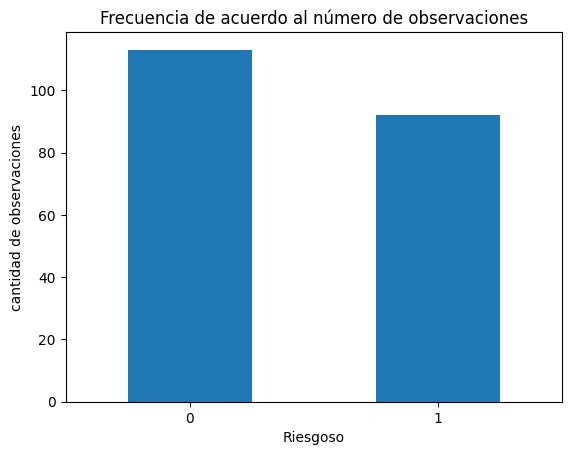

In [71]:
def crearBarras (etiquetas, y):
  count_classes = pd.value_counts(y, sort = True)
  count_classes.plot(kind = 'bar', rot=0)
  plt.xticks(range(2), etiquetas)
  plt.title("Frecuencia de acuerdo al número de observaciones")
  plt.xlabel("Riesgoso")
  plt.ylabel("cantidad de observaciones");

etiquetas= ['0','1']
crearBarras ( etiquetas, df['riesgoso'])

C:\Users\andres\AppData\Local\Temp\ipykernel_12136\2920958560.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(y, sort = True)


Antes de  resampling Counter({0: 77, 1: 66})
Despues del  resampling Counter({0: 77, 1: 77})


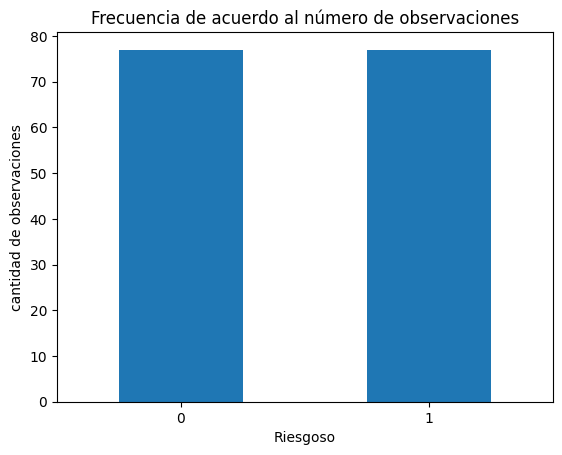

In [72]:
#Subsampling
os =  RandomOverSampler()
X_train_res, y_train_res = os.fit_resample(X_train, y_train)

print ("Antes de  resampling {}".format(Counter(y_train)))
print ("Despues del  resampling {}".format(Counter(y_train_res)))
crearBarras (etiquetas, y_train_res)

In [73]:
def svm_fn(x_train, y_train, max_depth=None, max_features=None):
    model = SVC(kernel='linear')
    model.fit(x_train, y_train)
    return model

In [74]:
def generar_modelo(X_train, y_train, X_test, y_test, opcion):
  if (opcion == 1):
    print("\n================== ")
    print("\nGenerando modelo con todos los parametros\n")
    print("================== \n")
  else:
    print("\n ==================")
    print("\n Generando modelo con los 7 mejores parámetros\n")
    print("================== \n")
  svm = svm_fn(X_train, y_train)
  y_pred = svm.predict(X_test)
  print("Accuracy: \n", metrics.accuracy_score(y_test, y_pred))
  print("\n================== \n")
  print("\nMatriz de confusión: \n",confusion_matrix(y_test, y_pred))

In [75]:
#generar_modelo(X_train_res, y_train_res, X_test, y_test, 1)



Generando modelo con todos los parametros


Accuracy: 
 0.8387096774193549



Matriz de confusión: 
 [[31  5]
 [ 5 21]]


In [76]:
# prepare input data
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder()
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc
# prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc

In [77]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

# prepare input data
#X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
X_train_enc =(X_train)
X_test_enc = (X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

In [78]:

# define the  model
model = Sequential()
# input_dim es el número de características (cantidad de columnas, variables)
# It means 140 input parameters, with 10 neurons in the FIRST hidden layer.
model.add(Dense(10, input_dim=X_train_enc.shape[1], activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
#binary_crossentropy para clase binaria, tambien hay 'categorical_crossentropy'
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X_train_enc, y_train_enc, epochs=100, batch_size=16, verbose=False)
# evaluate the keras model
_, accuracy = model.evaluate(X_test_enc, y_test_enc, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))
y_pred2 = model.predict(X_test_enc)

# Después de entrenar el modelo
model.save('modelo.h5')

Accuracy: 64.52
2/2 [==============================] - 0s 2ms/step


In [79]:
y_pred2>0.5

array([[False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [80]:
y_test_enc>0.5

array([False, False, False, False,  True,  True, False, False, False,
        True, False, False,  True,  True, False, False, False, False,
       False,  True,  True, False,  True, False, False, False, False,
       False, False,  True, False,  True,  True,  True,  True, False,
       False,  True, False,  True, False, False, False,  True, False,
       False,  True, False,  True,  True,  True,  True, False,  True,
       False, False,  True,  True,  True, False, False,  True])

In [81]:
# Elaborar una matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred2>0.5, y_test_enc>0.5)
print (cm)

[[15  1]
 [21 25]]


In [82]:
print((cm[0][0]+cm[1][1])/cm.sum())

0.6451612903225806


In [83]:
#construimos nuestra red neuronal
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras import layers, models
"""
def construir_red_neuronal():
  clf = models.Sequential()

  #primera capa
  clf.add(layers.Dense(units = 6, activation = "relu", input_dim=X_train_enc.shape[1]))
  clf.add(layers.Dropout(0.1))

  #segunda capa
  clf.add(layers.Dense(units = 6, activation = "relu"))
  clf.add(layers.Dropout(0.1))

  #segunda capa
  clf.add(layers.Dense(units = 1,kernel_initializer = "uniform", activation = "sigmoid"))

  #compilador de la RNA
  clf.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

  #clf.fit(y_train_enc, y_train_enc, batch_size = 10, epochs = 100)
  clf.fit(X_train_enc, y_train_enc, epochs=100, batch_size=16, verbose=0)
  return clf"""

def construir_red_neuronal():
    clf = Sequential()

    # Primera capa
    clf.add(Dense(units=6, activation="relu", input_dim=X_train_enc.shape[1], kernel_initializer="he_uniform"))
    clf.add(Dropout(0.2))

    # Segunda capa
    clf.add(Dense(units=6, activation="relu", kernel_initializer="he_uniform"))
    clf.add(Dropout(0.2))

    # Capa de salida
    clf.add(Dense(units=1, kernel_initializer="he_uniform", activation="sigmoid"))

    # Compilador de la RNA
    clf.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

    return clf

In [84]:
%matplotlib inline
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

2/2 [==============================] - 0s 3ms/step
0.41935483870967744
2/2 [==============================] - 0s 2ms/step
0.5806451612903226
2/2 [==============================] - 0s 2ms/step
0.5806451612903226
2/2 [==============================] - 0s 2ms/step
0.5806451612903226
2/2 [==============================] - 0s 3ms/step
0.5806451612903226
2/2 [==============================] - 0s 2ms/step
0.41935483870967744
2/2 [==============================] - 0s 3ms/step
0.41935483870967744
2/2 [==============================] - 0s 2ms/step
0.5483870967741935
2/2 [==============================] - 0s 3ms/step
0.5806451612903226
2/2 [==============================] - 0s 3ms/step
0.41935483870967744
2/2 [==============================] - 0s 2ms/step
0.5806451612903226
2/2 [==============================] - 0s 2ms/step
0.5806451612903226
2/2 [==============================] - 0s 2ms/step
0.5806451612903226
2/2 [==============================] - 0s 3ms/step
0.5806451612903226
2/2 [===========

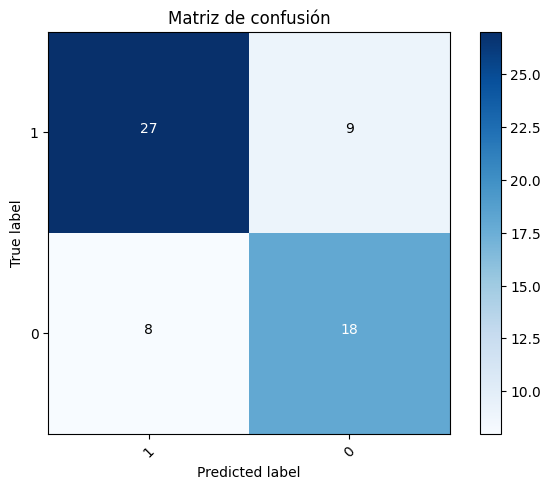

In [122]:
pres = 0
while pres < 0.70:
    clf = construir_red_neuronal()
    #predecir
    y_pred = clf.predict(X_test_enc)
    #y_pred
    y_pred = (y_pred>0.5)
    #y_pred
    y_test_enc2 =  (y_test_enc>0.5)
    # Elaborar una matriz de confusión
    
    cm = confusion_matrix(y_test_enc2, y_pred)
    pres = (cm[0][0]+cm[1][1])/cm.sum()
    print(pres)
from sklearn.metrics import confusion_matrix
plot_confusion_matrix(cm, ['1', '0'],title='Matriz de confusión')

In [107]:
def grafica1():
    # Crea el gráfico de pérdida vs. épocas
    plt.plot(historial.history['loss'], label='Pérdida de entrenamiento')
    # Si tienes validación, también puedes graficar la pérdida de validación
    if 'val_loss' in historial.history:
        plt.plot(historial.history['val_loss'], label='Pérdida de validación')
    
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.title('Pérdida vs. Épocas')
    plt.legend()
    plt.show()  # Muestra el gráfico

In [106]:
def grafica2():
    # Crea el gráfico de precisión vs. épocas
    plt.plot(historial.history['accuracy'], label='Precisión de entrenamiento')
    # Si tienes validación, también puedes graficar la precisión de validación
    if 'val_accuracy' in historial.history:
        plt.plot(historial.history['val_accuracy'], label='Precisión de validación')
    
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.title('Precisión vs. Épocas')
    plt.legend()
    plt.show()  # Muestra el gráfico

In [123]:
red = clf
def entrenar_modelo():
    print("Comenzando entrenamiento...")
    # Compilar el modelo
    # Entrenar el modelo y obtener el historial
    historial = red.fit(X_train_enc, y_train_enc, epochs=1000,validation_data=(X_test_enc, y_test_enc), verbose=False)  # Devuelve el objeto 'History'
    print("Modelo entrenado!")
    return historial  # Devuelve el objeto 'History'

"""from keras.callbacks import EarlyStopping
def entrenar_modelo():
    print("Comenzando entrenamiento...")
    #early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=20, verbose=1, restore_best_weights=False)
    #Entrenar el modelo y obtener el historial
    #historial = clf.fit(X_train_enc, y_train_enc, epochs=1000, validation_data=(X_test_enc, y_test_enc), verbose=False)  # Devuelve el objeto 'History'
    historial = clf.fit(X_train_enc, y_train_enc, 
                        epochs=1000, 
                        batch_size=16,
                        validation_data=(X_test_enc, y_test_enc),
                        verbose=False)  
    print("Modelo entrenado!")
    return historial  # Devuelve el objeto 'History'
    """


'from keras.callbacks import EarlyStopping\ndef entrenar_modelo():\n    print("Comenzando entrenamiento...")\n    #early_stopping = EarlyStopping(monitor=\'val_loss\', patience=10, verbose=1, restore_best_weights=True)\n    early_stopping = EarlyStopping(monitor=\'val_accuracy\', patience=20, verbose=1, restore_best_weights=False)\n    #Entrenar el modelo y obtener el historial\n    #historial = clf.fit(X_train_enc, y_train_enc, epochs=1000, validation_data=(X_test_enc, y_test_enc), verbose=False)  # Devuelve el objeto \'History\'\n    historial = clf.fit(X_train_enc, y_train_enc, \n                        epochs=1000, \n                        batch_size=16,\n                        validation_data=(X_test_enc, y_test_enc),\n                        verbose=False)  \n    print("Modelo entrenado!")\n    return historial  # Devuelve el objeto \'History\'\n    '

Comenzando entrenamiento...
Modelo entrenado!


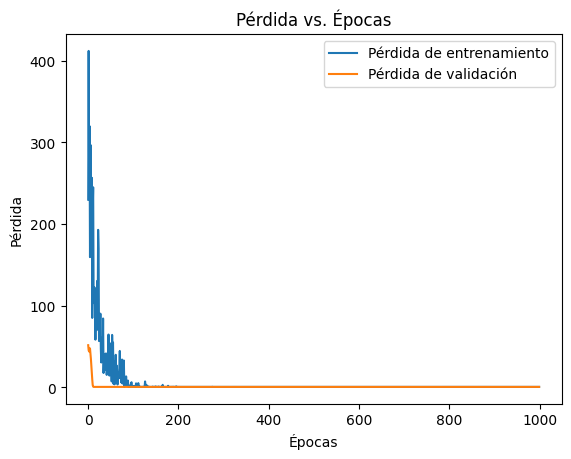

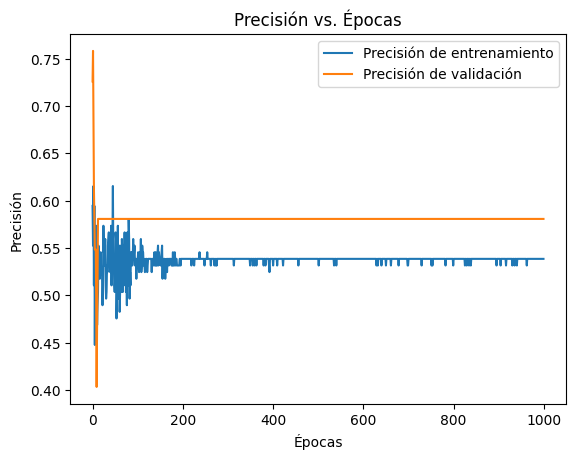

In [124]:
historial = entrenar_modelo()
grafica1()
grafica2()